# Chargement des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mylib.fonction_exploration import exploration1, exploration2, exploration3, exploration4
from mylib.fonction_pk import test_pk
from mylib.fonction_merge import df_merge
from mylib.fonction_acp import display_circles, display_factorial_planes, display_scree_plot
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import seaborn as sns
from pandas_profiling import ProfileReport
import plotly.express as px
from IPython.display import display_html 

from sklearn.cluster import KMeans
from sklearn import decomposition
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing
#from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

print("Version numpy : " + np.__version__)
print("Version pandas : " + pd.__version__)

bold = "\033[1m"
red = "\033[31m"
end = "\033[0;0m"

chemin = '../src/df_2015_cleaned.csv'

Version numpy : 1.23.5
Version pandas : 1.4.4


# Chargement du fichier nettoyé

In [2]:
p9 = pd.read_csv(chemin)

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Exploration

In [4]:
exploration1(p9)

,iso,Country,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
0,AFG,Afghanistan,33753499,21.500000,0.478000,3.425000,59.830000,0,2390000000,165000000,330000000,48.000000,6.950000,5500.665000,2128.125938,15.399904,-165000000,10.977474,121.476510
1,ZAF,South Africa,55876504,5.200000,0.716000,2.412000,177.110000,1,15456000000,1681000000,1040000000,92.000000,6.350000,8769.679000,13581.755282,6.546456,641000000,99.500004,163.291139
2,ALB,Albania,2880703,4.900000,0.795000,1.928000,319.630000,1,1686000000,118000000,107000000,8.000000,1.240000,1499.451000,11659.062521,-0.843042,11000000,265.643803,-4.464286
,iso,Country,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
141,ECU,Ecuador,16195902,9.000000,0.765000,2.040000,96.950000,1,2904000000,110000000,165000000,96.000000,10.500000,9561.102000,11071.294721,6.288168,-55000000,82.354617,-39.781022
142,USA,United States,320738994,2.500000,0.920000,2.257000,186.750000,1,406348000000,55135000000,14383000000,1.500000,2.800000,7456.767000,56762.729452,2.938382,40752000000,1080.161749,-7.266280
143,ETH,Ethiopia,102471895,14.800000,0.460000,2.271000,105.830000,1,15646000000,660000000,87000000,56.913460,17.870000,5368.907000,1630.877462,11.603361,573000000,46.855768,107.142857
,iso,Country,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
103,PER,Peru,30711863,5.900000,0.759000,2.102000,219.440000,1,11404000000,664000000,2849000000,48.000000,2.810000,10147.580000,11481.464557,4.186694,-2185000000,151.882313,32.573290
41,RUS,Russian Federation,144096870,2.500000,0.824000,3.148000,229.230000,1,66963000000,5005000000,3195000000,72.000000,5.330000,3350.928000,24085.324219,0.794596,1810000000,235.478220,-15.026596


In [5]:
exploration2(p9)

,Nombre de valeurs totales,Type des données,Nombre de NaN,NaN en %,Nombre de valeurs uniques,Valeurs uniques en%
iso,144,object,0,0.00,144,100.00
Country,144,object,0,0.00,144,100.00
Population,144,int64,0,0.00,144,100.00
Under-nourishment (%),144,float64,0,0.00,72,50.00
HDI,144,float64,0,0.00,130,90.28
Peace_index,144,float64,0,0.00,141,97.92
Vegetables disponibility (kg/cap/year),144,float64,0,0.00,144,100.00
Enough veg intake (> 91.25 kg/cap/year),144,int64,0,0.00,2,1.39
Production,144,int64,0,0.00,142,98.61
Exportations,144,int64,0,0.00,111,77.08


In [6]:
exploration3(p9)


---------------------------------------
Nombre de lignes et de colonnes (shape)
--------------------------------------- 

(144, 19) 

--------------------------------------
Affichage des NaN (isna().any(axis=1))
-------------------------------------- 

Empty DataFrame
Columns: [iso, Country, Population, Under-nourishment (%), HDI, Peace_index, Vegetables disponibility (kg/cap/year), Enough veg intake (> 91.25 kg/cap/year), Production, Exportations, Importations, Customs duration (h), Customs tax (%), Distance (km), Gdp/cap, Population evolution (4y, %), Trade balance (exp-imp), Self-sufficiency (prod-dispo), Market growth (2y, %)]
Index: [] 

---------------------------------------
Nombre de doublons (duplicated().sum())
--------------------------------------- 

0 

-----------------------------------------------------
Affichage des doublons (df[df.duplicated()].head(10))
----------------------------------------------------- 

Empty DataFrame
Columns: [iso, Country, Population, Under-

In [7]:
exploration4(p9)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
iso,144,144,AFG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,144,144,Afghanistan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population,144.00,NaN,NaN,NaN,49710495.56,162925131.95,330815.00,4876264.75,11011434.00,34936070.50,1379860000.00
Under-nourishment (%),144.00,NaN,NaN,NaN,9.41,9.79,2.50,2.50,5.50,12.80,49.90
HDI,144.00,NaN,NaN,NaN,0.72,0.16,0.38,0.58,0.74,0.84,0.95
Peace_index,144.00,NaN,NaN,NaN,2.03,0.44,1.12,1.74,2.00,2.26,3.42
Vegetables disponibility (kg/cap/year),144.00,NaN,NaN,NaN,196.33,94.69,39.11,129.97,169.44,254.64,472.61
Enough veg intake (> 91.25 kg/cap/year),144.00,NaN,NaN,NaN,0.92,0.28,0.00,1.00,1.00,1.00,1.00
Production,144.00,NaN,NaN,NaN,21500604166.67,93836917786.19,13000000.00,1168500000.00,3436000000.00,12447500000.00,1023074000000.00
Exportations,144.00,NaN,NaN,NaN,2201458333.33,6519215707.34,0.00,17000000.00,126000000.00,828500000.00,55135000000.00


In [8]:
p9.sample()

,iso,Country,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
14,BOL,Bolivia,11090085,14.30,0.69,2.07,154.12,1,2869000000,127000000,114000000,48.00,10.05,9905.80,6992.13,6.67,13000000,104.58,37.35


# Vérification des outliers en prévision de l'ACP

In [9]:
# on détermine les colonnes numériques
num = []
for i in p9.columns:
    if p9[i].dtypes == int or p9[i].dtypes == float:
        num.append(i)

## Z-score

In [10]:
# on calcule le z-score sur toutes les variables numériques
for i in num:
    p9.sort_values(by=i, inplace=True)
    outlier_z = p9[stats.zscore(p9[i]) > 1.96]
    nb_outlier_z = len(outlier_z)
    print(bold + f"\n{i} : {nb_outlier_z} outliers \n\n" + end + f"{outlier_z[['Country', i]]} \n" + "-" * 50)


Population : 2 outliers 

   Country  Population
52   India  1322866505
26   China  1379860000 
--------------------------------------------------

Under-nourishment (%) : 9 outliers 

                      Country  Under-nourishment (%)
83                 Mozambique                  29.70
66                    Lesotho                  30.30
106                    Rwanda                  35.30
111          Congo, Dem. Rep.                  35.50
70                    Liberia                  36.40
73                 Madagascar                  40.20
49                      Haiti                  42.40
136               Yemen, Rep.                  43.40
107  Central African Republic                  49.90 
--------------------------------------------------

HDI : 0 outliers 

Empty DataFrame
Columns: [Country, HDI]
Index: [] 
--------------------------------------------------

Peace_index : 6 outliers 

                      Country  Peace_index
69                      Libya         2

## Log

In [11]:
p9_log = p9.copy()
p9_log = p9_log.set_index(['Country'])
p9_log = p9_log[num]
p9_log.sample()

,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
Country,,,,,,,,,,,,,,,,,
Chile,17870124,3.10,0.85,1.63,141.55,1,4674000000,692000000,1835000000,60.00,1.17,11569.81,22691.49,4.06,-1143000000,120.00,31.54


### Graphiques de distribution

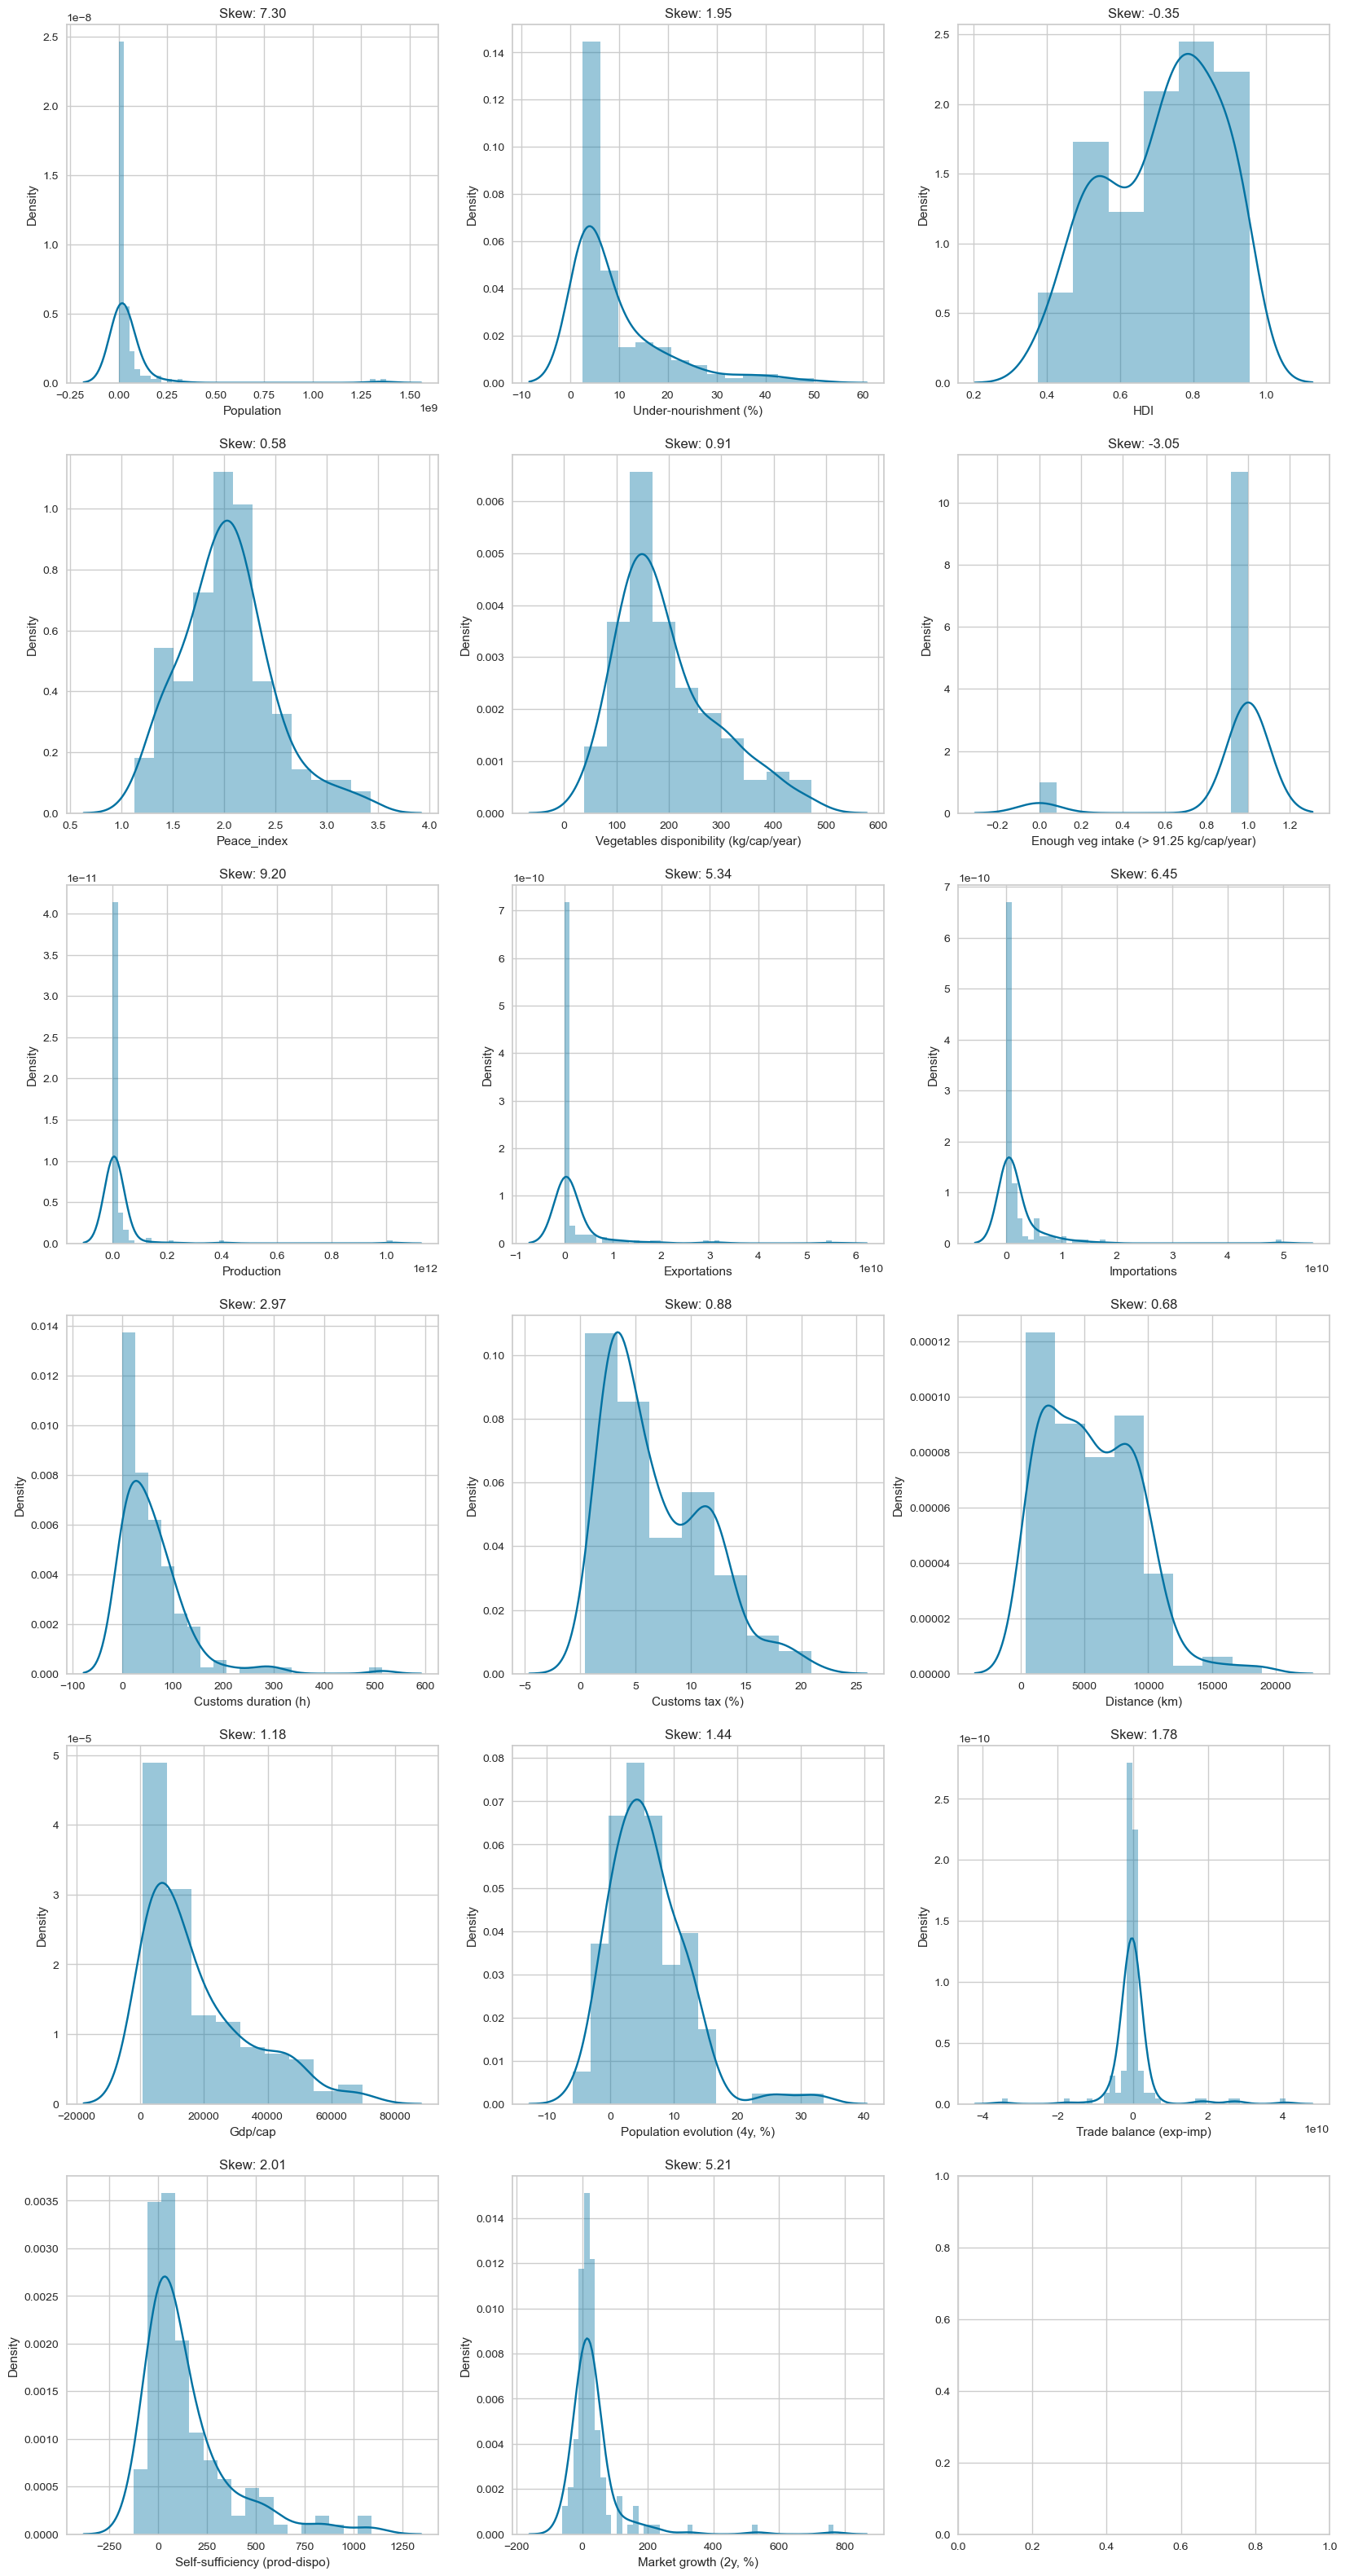

In [12]:
f, a = plt.subplots(6, 3, figsize=(20,40))
a = a.flatten()
for i, col in enumerate(p9_log.columns):
    sns.distplot(p9_log[col], ax=a[i], kde= True).set_title('Skew: {:.2f}'.format(p9_log[col].skew()))
plt.show()

### Calcul de Skew et Kurtosis

In [13]:
#Calculating Skew and Kurtosis 
for i in p9_log.columns:
    kurtosis = round((stats.kurtosis(p9_log[i])), ndigits=2)
    skew = round((stats.skew(p9_log[i])), ndigits=2)
    #print("\nkurtosis :", i, kurtosis) 
    #print("skew", i, skew, "\n")
    print("\n" + "-" * 50 + bold + f"\n{i} : kurtosis {kurtosis}" + end)
    print(bold + f"{i} : skew {skew} \n" + end)
#Interpreting Kurtosis
    if  -0.5 < kurtosis < 0.5:
        print (f'A kurtosis of {kurtosis} means the distribution is approximately normal sometimes called mesokurtic distributions')
    elif kurtosis <= -0.5: 
        print (f'A kurtosis of {kurtosis} means the distribution is light-tailed (negative) sometimes called a platykurtic distributions')
    elif kurtosis >= 0.5:
        print (f'A kurtosis of {kurtosis} means the distribution is heavy-tailed (positive) sometimes called a leptokurtic distribution')
#Interpreting Skewness
    if -0.5 < skew < 0.5:
        print (f'A skew of {skew} means the distribution is approx. symmetric')
    elif  -1 < skew < -0.5 or 0.5 < skew < 1.0:
        print (f'A skew of {skew} means the distribution is moderately skewed')
    else:
        print (f'A skew of {skew} means the distribution is highly skewed')


--------------------------------------------------
Population : kurtosis 54.64
Population : skew 7.23 

A kurtosis of 54.64 means the distribution is heavy-tailed (positive) sometimes called a leptokurtic distribution
A skew of 7.23 means the distribution is highly skewed

--------------------------------------------------
Under-nourishment (%) : kurtosis 3.53
Under-nourishment (%) : skew 1.93 

A kurtosis of 3.53 means the distribution is heavy-tailed (positive) sometimes called a leptokurtic distribution
A skew of 1.93 means the distribution is highly skewed

--------------------------------------------------
HDI : kurtosis -0.97
HDI : skew -0.34 

A kurtosis of -0.97 means the distribution is light-tailed (negative) sometimes called a platykurtic distributions
A skew of -0.34 means the distribution is approx. symmetric

--------------------------------------------------
Peace_index : kurtosis 0.62
Peace_index : skew 0.57 

A kurtosis of 0.62 means the distribution is heavy-tailed (

### Test de normalité

In [14]:
# calculate
for i in p9_log.columns:
    stat, p = stats.normaltest(p9_log[i])
    print (bold + f'{i}' + end + f': \nStatistic={stat}, p={p}')
   # print ('--'*25) 

# interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
        print ('--'*25) 
    else:
        print('Sample does not look Gaussian (reject H0)')
        print ('--'*25) 

Population: 
Statistic=234.50533281086342, p=1.1962280771008514e-51
Sample does not look Gaussian (reject H0)
--------------------------------------------------
Under-nourishment (%): 
Statistic=65.00723068608852, p=7.65348463421206e-15
Sample does not look Gaussian (reject H0)
--------------------------------------------------
HDI: 
Statistic=22.97632071499547, p=1.0250743099476877e-05
Sample does not look Gaussian (reject H0)
--------------------------------------------------
Peace_index: 
Statistic=9.936779040970993, p=0.006954338841285828
Sample does not look Gaussian (reject H0)
--------------------------------------------------
Vegetables disponibility (kg/cap/year): 
Statistic=16.908007644916644, p=0.00021304570827029203
Sample does not look Gaussian (reject H0)
--------------------------------------------------
Enough veg intake (> 91.25 kg/cap/year): 
Statistic=107.400527706075, p=4.7672917617076685e-24
Sample does not look Gaussian (reject H0)
--------------------------------

In [15]:
#pip install outliers

In [16]:
#import numpy as np
#from OUTLIERS import smirnov_grubbs as grubbs

#grubbs.max_test(p9.Population, alpha=.01)

### Mise en log des colonnes éligibles

In [17]:
p9.columns

Index(['iso', 'Country', 'Population', 'Under-nourishment (%)', 'HDI',
       'Peace_index', 'Vegetables disponibility (kg/cap/year)',
       'Enough veg intake (> 91.25 kg/cap/year)', 'Production', 'Exportations',
       'Importations', 'Customs duration (h)', 'Customs tax (%)',
       'Distance (km)', 'Gdp/cap', 'Population evolution (4y, %)',
       'Trade balance (exp-imp)', 'Self-sufficiency (prod-dispo)',
       'Market growth (2y, %)'],
      dtype='object')

In [18]:
# Data varies in several magnitudes and has both positive, zero and negative numbers  
# log modulus transform 
log_columns = ['Population', 'Under-nourishment (%)', 'Peace_index', 'Vegetables disponibility (kg/cap/year)',
              'Production', 'Exportations', 'Importations', 'Customs duration (h)', 'Customs tax (%)',
               'Distance (km)', 'Gdp/cap', 'Trade balance (exp-imp)', 'Population evolution (4y, %)',
               'Self-sufficiency (prod-dispo)', 'Market growth (2y, %)']
for i in log_columns:
    p9_log[i] = np.sign(p9_log[i])*(np.log10(np.abs(p9_log[i])+1))
    
p9_log

,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
Country,,,,,,,,,,,,,,,,,
Ukraine,7.65,0.54,0.77,0.59,2.47,1,10.74,10.29,8.10,0.85,0.71,3.36,4.01,-0.34,10.29,2.96,-1.79
Tanzania,7.72,1.37,0.52,0.46,2.45,1,10.33,8.64,7.70,1.99,1.11,3.83,3.36,1.15,8.59,2.12,-1.72
Brazil,8.31,0.54,0.75,0.51,2.18,1,11.11,10.47,9.18,1.70,1.17,3.94,4.17,0.66,10.45,2.67,-1.67
Cameroon,7.36,0.81,0.56,0.52,2.50,1,10.05,7.62,7.76,2.31,1.30,3.66,3.54,1.13,-7.20,2.26,-1.61
Ecuador,7.21,1.00,0.77,0.48,1.99,1,9.46,8.04,8.22,1.99,1.06,3.98,4.04,0.86,-7.74,1.92,-1.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chad,7.15,1.46,0.39,0.54,1.91,0,9.14,6.30,7.73,2.03,1.26,3.62,3.26,1.20,-7.72,1.29,2.34
Uzbekistan,7.50,0.54,0.70,0.51,2.59,1,10.18,8.47,8.08,2.05,1.17,3.71,3.82,0.89,8.24,2.00,2.36
Vietnam,7.96,0.96,0.68,0.46,2.28,1,10.53,10.04,9.91,1.79,0.86,4.00,3.88,0.73,9.43,2.25,2.51


## **Boxplots**

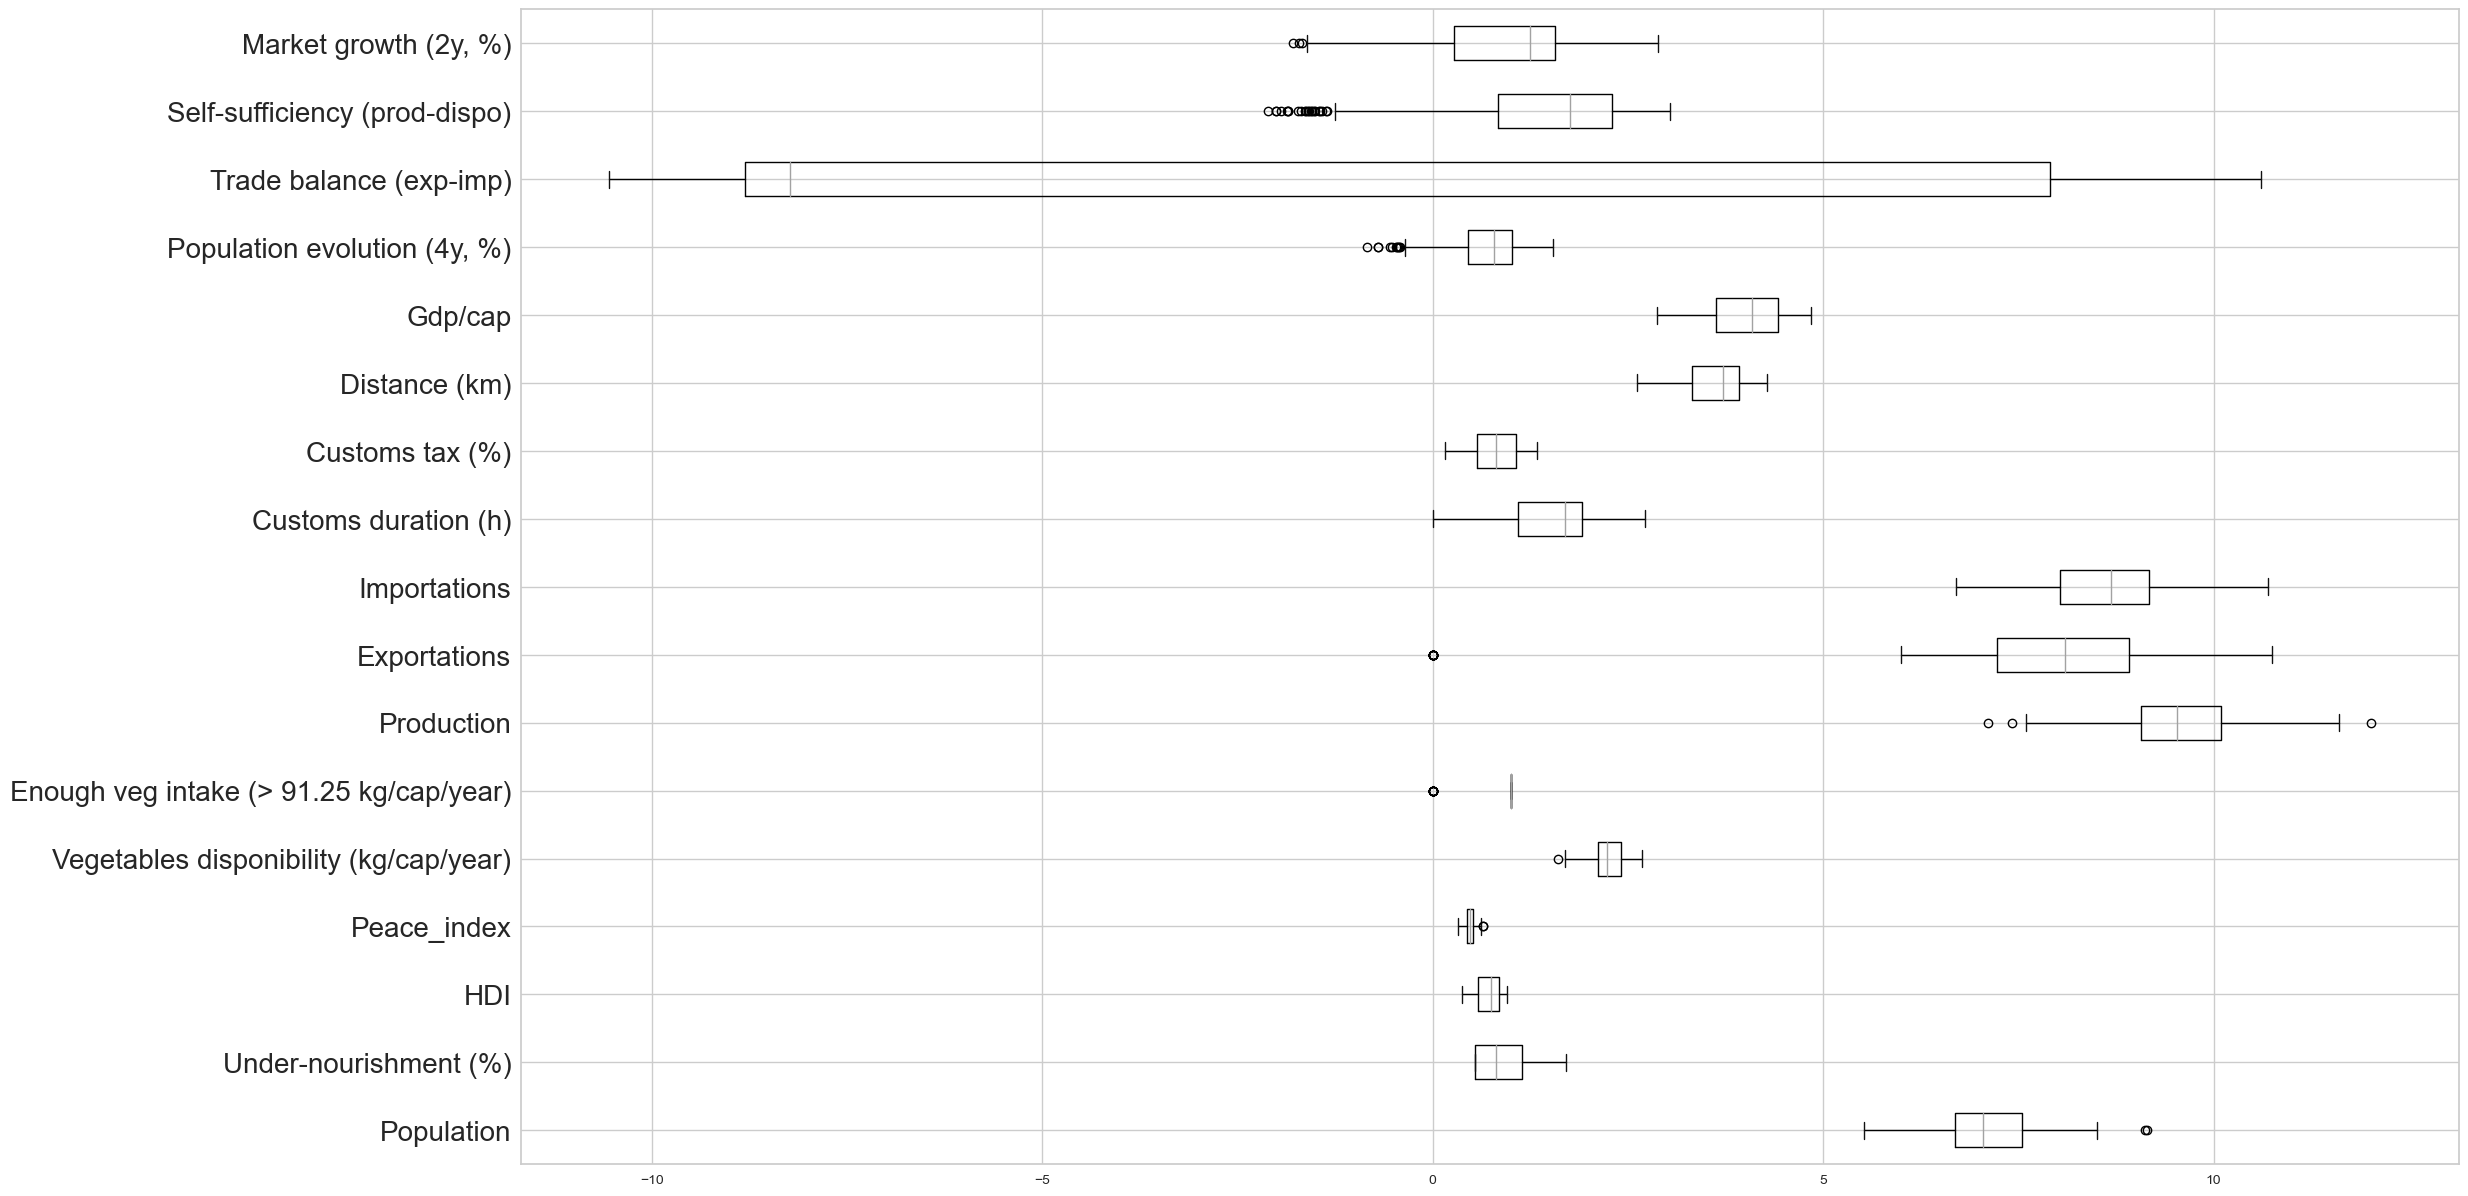

In [19]:
# création boxplots
fig=plt.figure(figsize=(25,15))
p9_log.boxplot(vert=False)
plt.yticks(size=20)
plt.show()

In [20]:
#pd.options.display.max_rows = None

# Vérification des corrélations

<span style="color:red">**Les distributions des variables n'étant pas toutes normales, nous allons utiliser le test de Spearman pour avoir un aperçu des corrélations**</span>

## Corrélation de Spearman

In [21]:
corr = p9_log.corr(method='spearman')
#corr

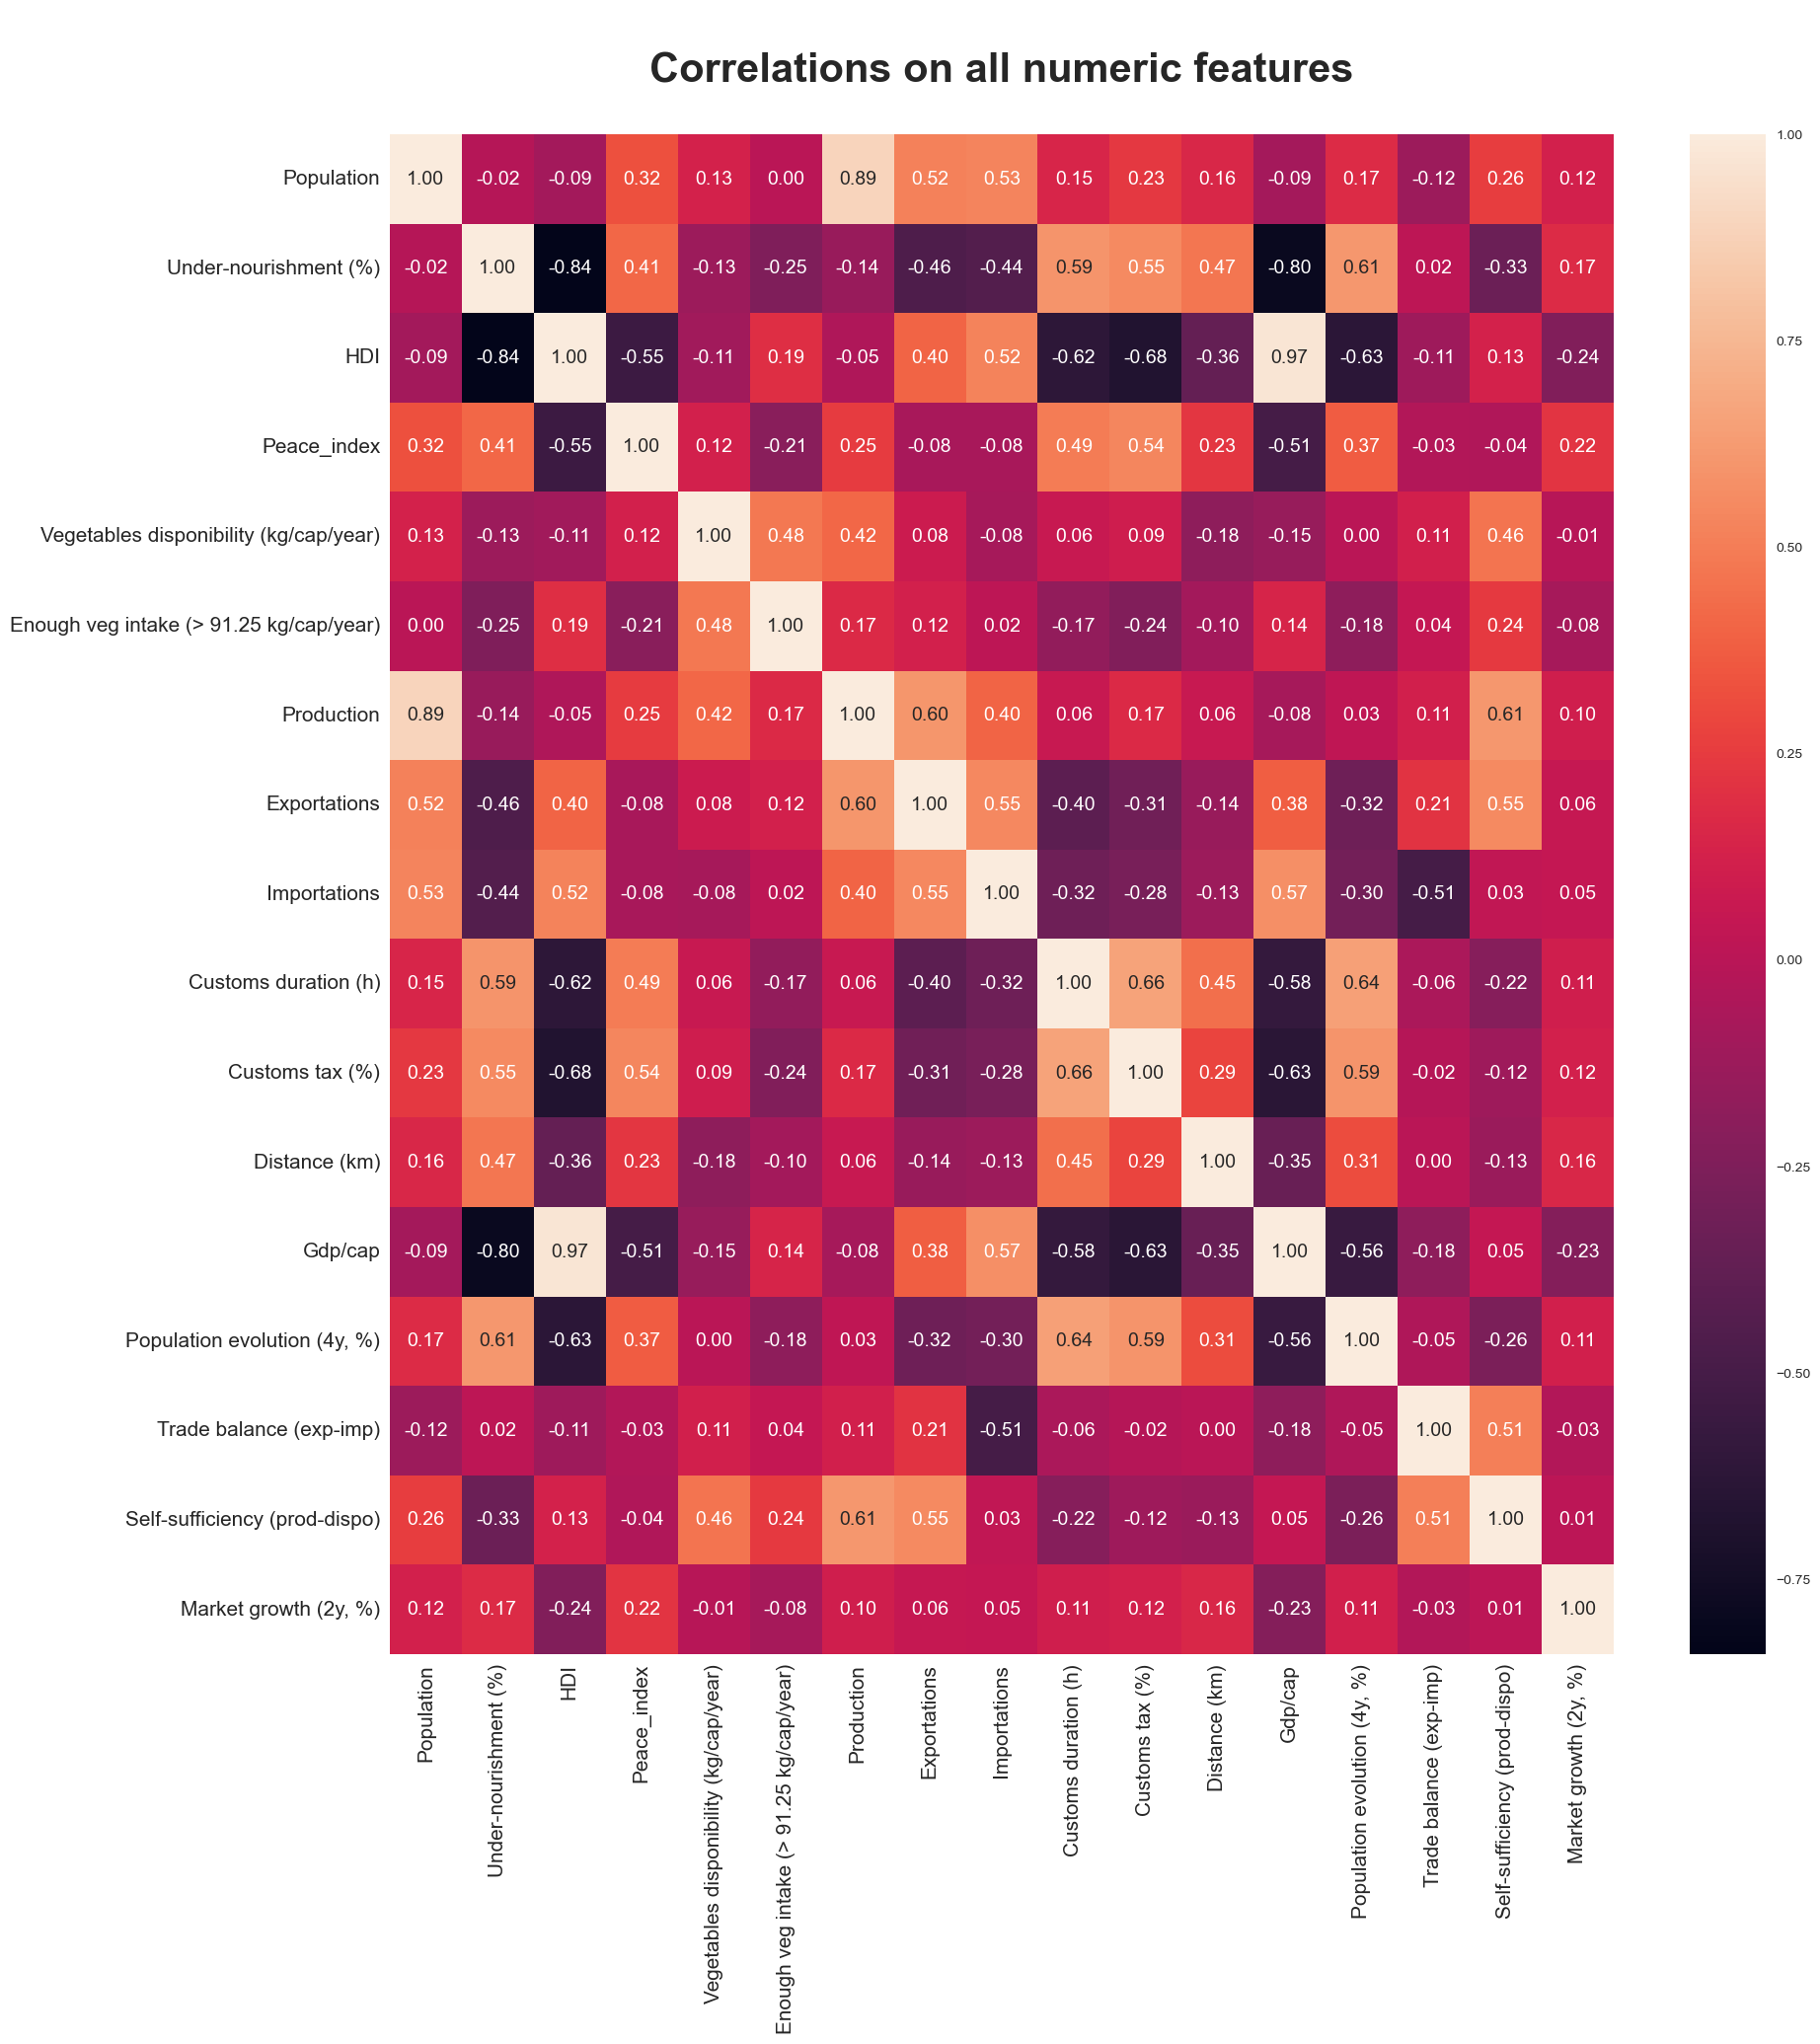

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(p9_log.corr(method='spearman'), annot=True, annot_kws={"size": 14}, fmt=".2f")
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("\nCorrelations on all numeric features\n", size=30, fontweight='bold' )
plt.show()

''

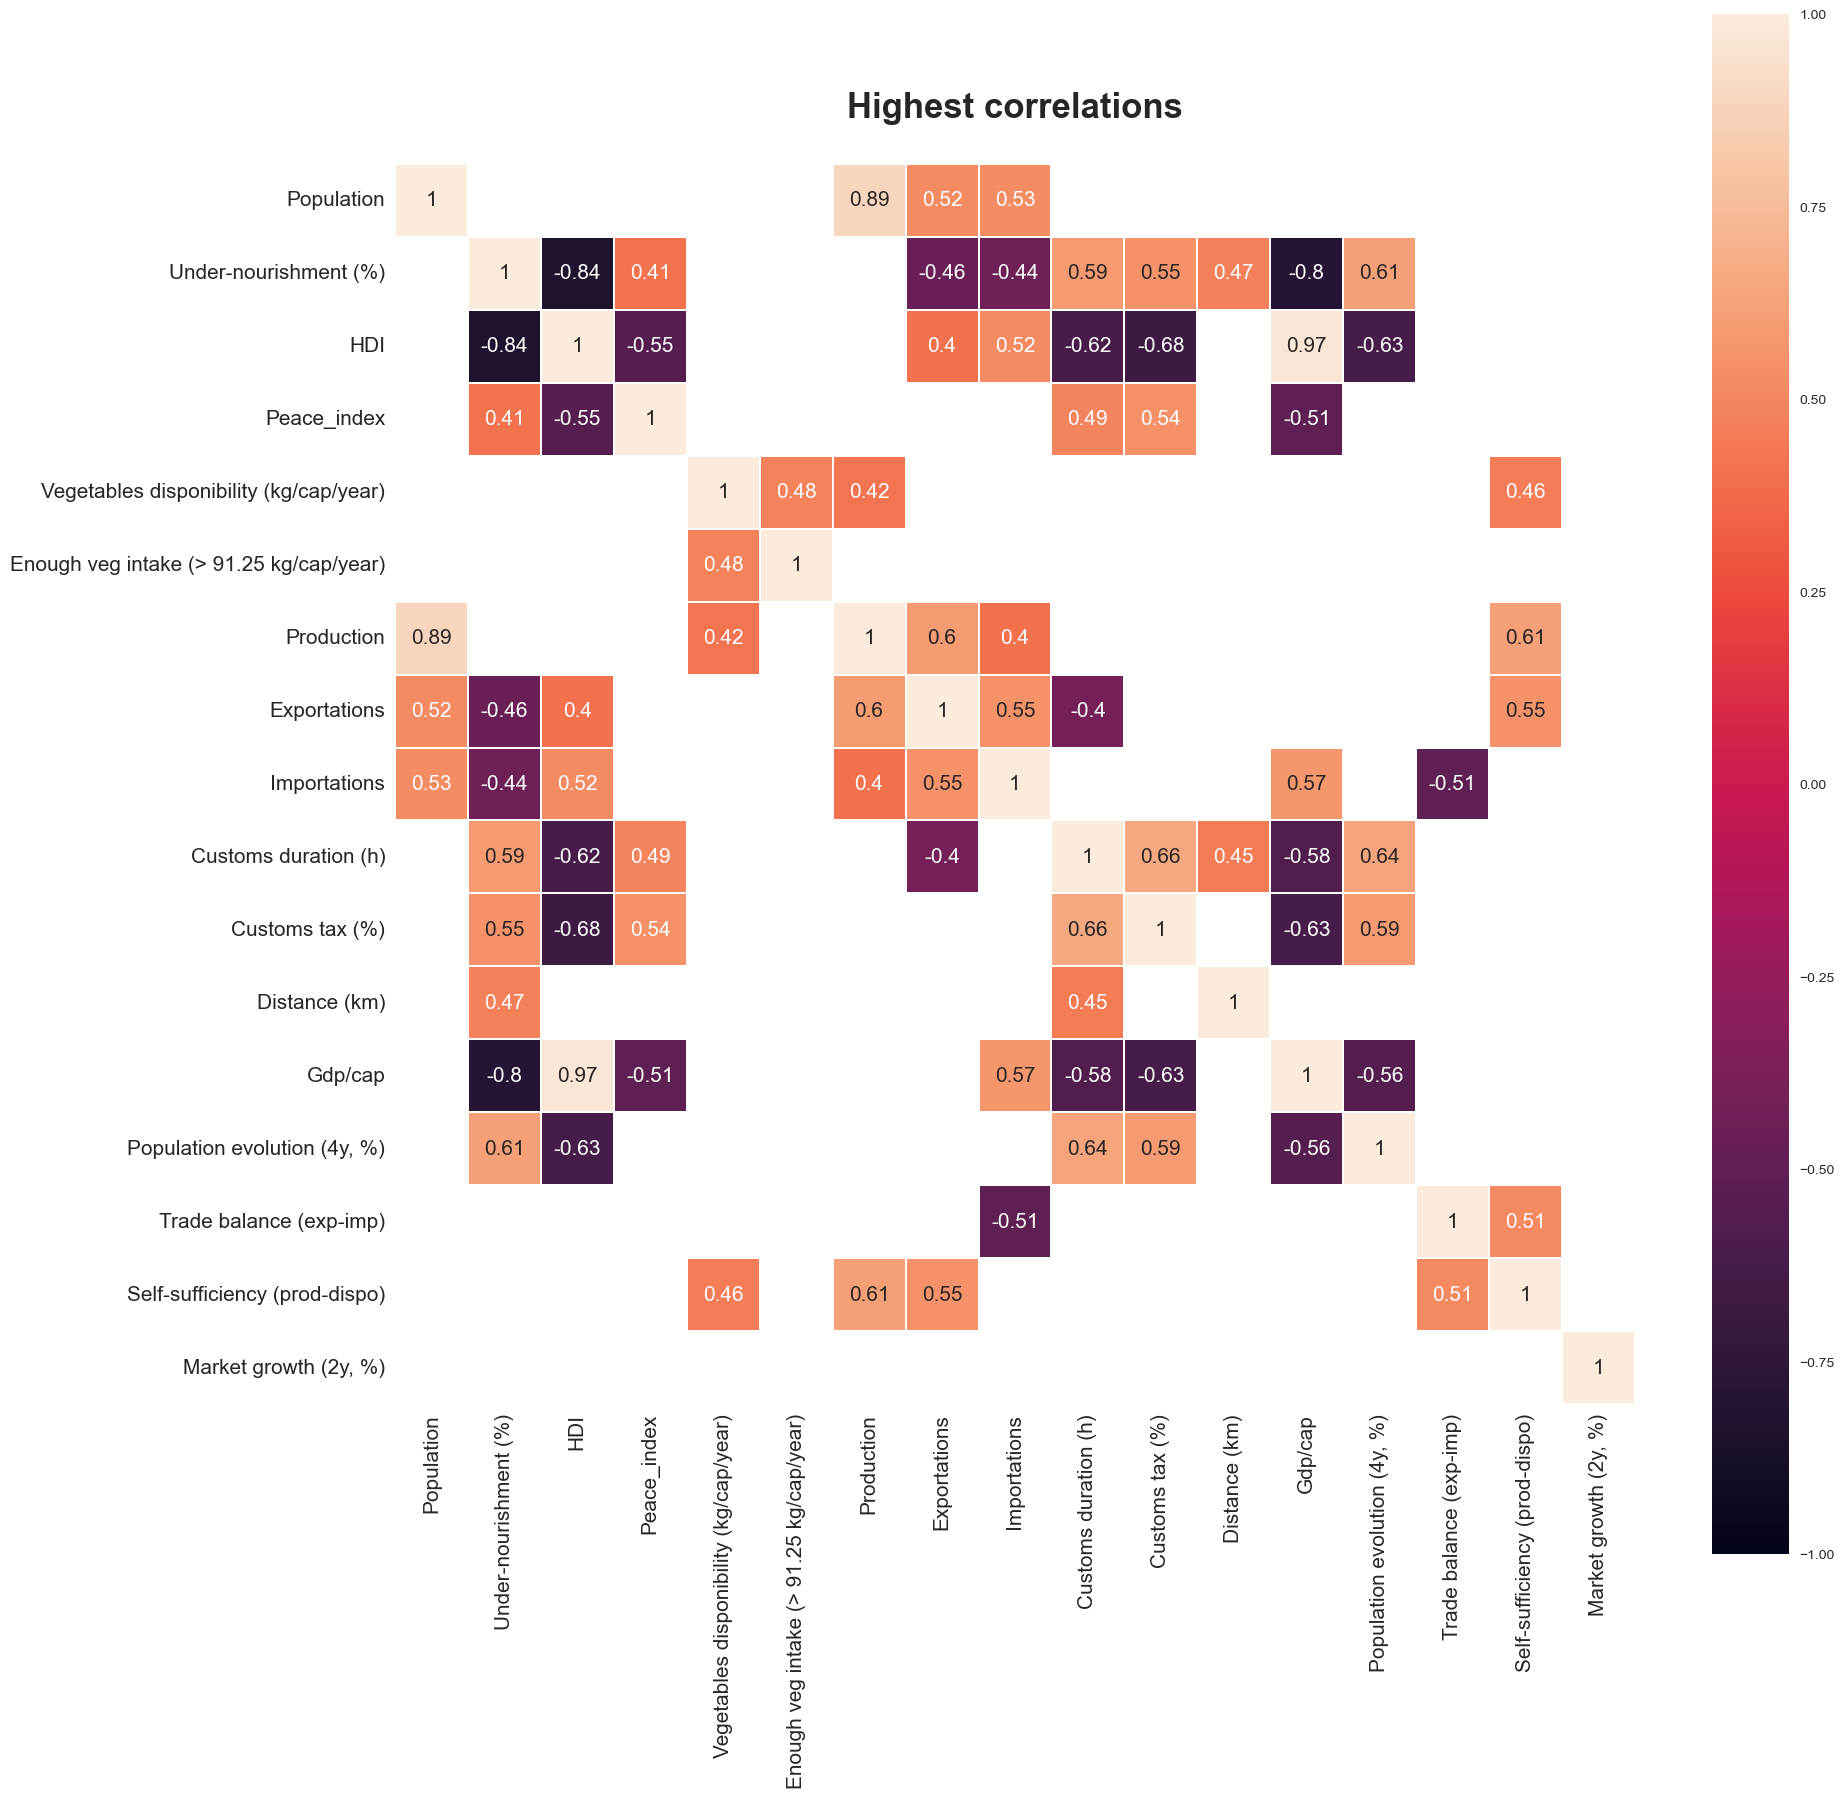

In [23]:
# Beaucoup d'informations, on va visualiser les corrélations les plus élevées
plt.figure(figsize=(20, 20))
sns.heatmap(np.round(corr, 2)[(corr >= 0.4) | (corr <= -0.4)], 
            vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 15}, square=True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("\nHighest correlations\n", size=25, fontweight='bold' )
;

# Visionnage du DataFrame final (log) avant analyse

In [24]:
cell_hover = {
    "selector": "td:hover",
    "props": [("background-color", "#FFFFE0")]
}
index_names = {
    "selector": ".index_name",
    "props": "background-color: #DC7633; font-style: italic; color: white; font-weight:normal;"
}
headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #DC7633; color: white; text-align: center"
}

properties = {"border": "1px solid black", "width": "90px", "text-align": "center"}

styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "150%"),
                              ("color", 'black')])]

p9_log.head(50).style.format(precision=2).highlight_max(axis=0, props='color:white; font-weight:bold; background-color:darkblue;').set_table_styles(
    styles, [cell_hover, index_names, headers]).set_properties(**properties).set_caption('Log DataFrame')

#p9_log.style.set_sticky(axis='index')
#p9_log.style.set_table_styles([cell_hover, index_names, headers])
#cm = sns.light_palette("orange", as_cmap=True)
#p9_log.style.background_gradient(cmap=cm)

#p9_log.style.highlight_max(axis=0, props='color:white; font-weight:bold; background-color:darkblue;')

,Population,Under-nourishment (%),HDI,Peace_index,Vegetables disponibility (kg/cap/year),Enough veg intake (> 91.25 kg/cap/year),Production,Exportations,Importations,Customs duration (h),Customs tax (%),Distance (km),Gdp/cap,"Population evolution (4y, %)",Trade balance (exp-imp),Self-sufficiency (prod-dispo),"Market growth (2y, %)"
Country,,,,,,,,,,,,,,,,,
Ukraine,7.65,0.54,0.77,0.59,2.47,1,10.74,10.29,8.10,0.85,0.71,3.36,4.01,-0.34,10.29,2.96,-1.79
Tanzania,7.72,1.37,0.52,0.46,2.45,1,10.33,8.64,7.70,1.99,1.11,3.83,3.36,1.15,8.59,2.12,-1.72
Brazil,8.31,0.54,0.75,0.51,2.18,1,11.11,10.47,9.18,1.70,1.17,3.94,4.17,0.66,10.45,2.67,-1.67
Cameroon,7.36,0.81,0.56,0.52,2.50,1,10.05,7.62,7.76,2.31,1.30,3.66,3.54,1.13,-7.20,2.26,-1.61
Ecuador,7.21,1.00,0.77,0.48,1.99,1,9.46,8.04,8.22,1.99,1.06,3.98,4.04,0.86,-7.74,1.92,-1.61
Togo,6.87,1.33,0.51,0.47,2.47,1,9.47,6.95,7.34,1.88,1.11,3.64,3.27,1.07,-7.11,2.02,-1.54
Timor-Leste,6.08,1.41,0.61,0.44,2.18,1,8.35,0.00,6.70,1.99,0.54,4.12,3.46,0.97,-6.70,1.54,-1.47
Armenia,6.46,0.58,0.77,0.51,2.68,1,9.28,7.46,7.88,1.60,0.87,3.53,4.01,-0.43,-7.66,2.27,-1.45
Tajikistan,6.93,0.64,0.66,0.51,2.41,1,9.55,8.11,7.63,1.88,0.85,3.73,3.49,1.02,7.93,2.20,-1.43


# Exportations des fichiers

In [25]:
p9.to_excel('../src/p9_2015_cleaned.xlsx', index=False)
p9_log.to_excel('../src/p9_log_2015_cleaned.xlsx', index=True)
print("Exportation terminée")

Exportation terminée
